# Linear Regression in the Context of Machine Learning

This will be a rather short entry, as it is in many Machine Learning courses. The reason being that Linear Regression is usually just an afterthought on the way to the derivation and explanation of the Multi Layer Perceptron. Linear Regression in many ways is the most basic implementation of the MLP, as it is essentially just the forward pass of the MLP in a continous estimation context. Linear Regression also gives a good understanding as to why the most basic layer in many libraries is called the "Linear" layer. 

## Linear Regression explained Mathematically

Linear regression can be described as a basic dot product between a feature set and a set of weights with an added bias. So let's say we have a dataset with n features $$x = [x_1 , x_2 ,x_3 , ...x_n] $$ In order to implement linear regression we would construct a weight vector $$w = [w_1 , w_2 , w_3 , ...w_n]$$ linear regression would then be described as $$\hat{y} = x_1 w_1 + x_2 w_2 + x_3 w_3 + ...+ x_n w_n + b$$ $$\hat{y} = x \bullet w + b$$

The bias term is used to push the model in an additional direction independant of the weights or the features, it is derived from the algebraic description of a linear function $$y = mx + b$$ Its ends up playing a crucial role in neural networks allowing for negative numbers in activation functions that are non linear, this is a bit out of the scope of this section.

## Basic Linear Regression "Forward" Pass

In [1]:
import numpy as np
class LinearModel(object):
    def __init__(self,number_of_features):
        self.weights = np.random.randn(number_of_features,1)
        self.bias = np.random.randn(1)

    def forward(self,x):
        return np.matmul(x,self.weights) + self.bias


In [2]:
x = np.array([1,2,3,4])
linear_regression_model = LinearModel(4)

linear_regression_model.forward(x)

array([-8.02763348])

One thing you might notice from this however is that we have no way to determine how to initialize the weights, nor do we have any idea how we will verify if this model produces anything useful. Let's begin with defining something that tells us the usefulness of the model. For that we can use the Mean Squared Error defined as such $$MSE =\frac{1}{n} \sum_{i=1}^{n}  (y_i - \hat{y_i})^2$$ where n is the number of samples that we have and are trying to estimate. I've chosen this because it is rather intuitive to understand, we simply take the difference between the true value we are trying to predict and the linear model's prediction, square it, repeat for every sample, then divide by the total number of samples. This gives us an idea of how far off the model is on average from its true prediction, squaring allows us to view the MSE as a sort of distance from the true value, recall that the distance between two points is simply $\sqrt( [x_1 - y_1]^2 + [x_2 - y_2]^2,+ \cdots,+ [x_n - y_n]^2)$ so the MSE can be thought of as the distance between the estimator and the true value prior to taking the square root.

# Optimizing the weights of a Linear Regression Model

Now that we have a way to gauge the effectiveness of the predictor, we need to derive a way to properly optimize the weights. You may have noticed that in the basic Linear Model we used random weights, without optimizing them our predictor is going to perform quite poorly. So we will now begin with explaining the very heart of Machine Learning.

## Gradient Descent

Now that we have our weights, and our error function, we can begin to explain how most Machine Learning Algorithms are optimized. The trick is gradient descent, that which most of us covered in Calculus. First, we must explain what the gradient is.
### The Gradient

The gradient is usually denoted by the greek letter $\nabla$ and it described the slope of a function, otherwise known as the rate of change. It is a vector of the partial derivatives with regards to the weights. With the gradient we can then update each weight in the linear model to eventually converge into an estimator that reliably minimizes the mean squared error. This can be described like so $$w_{update} = [w_1 - \nabla f(w_1) ,w_2 - \nabla f(w_2), \cdots , w_3 \nabla f(w_n) ]$$ More formally this is described as $$w_{update} = [w_1 - \frac{\partial L}{\partial w_1}, w_2 - \frac{\partial L}{\partial w_2}, \cdots, w_n \frac{\partial L}{\partial w_n} ]$$ However, due to the fact that there can be thousands of samples and the function we are trying to minimize can be quite complex, there can be many situations in which outlier samples or improper weight initializations can cause the algorithm to get stuck in suboptimal local minima. This is because at the derivative at a local minima can end up approaching zero. Think of us as trying to consistently find the lowest point on a plane and we find a nice comfy valley, but if we climb a small hill there is an even deeper valley. Without some technique to climb that small hill we will get trapped in our current valley, alternatively we can also end up over shooting our valleys and end up at at the top of some hill if our gradient is enormous. For this reason we normally implement a learning rate of a very small number $\alpha$. Meaning the gradient vector can be more formally described as:$$w_{update} = [w_1 - \alpha \frac{\partial L}{\partial w_1}, w_2 - \alpha \frac{\partial L}{\partial w_2}, \cdots, w_n \alpha \frac{\partial L}{\partial w_n} ]$$


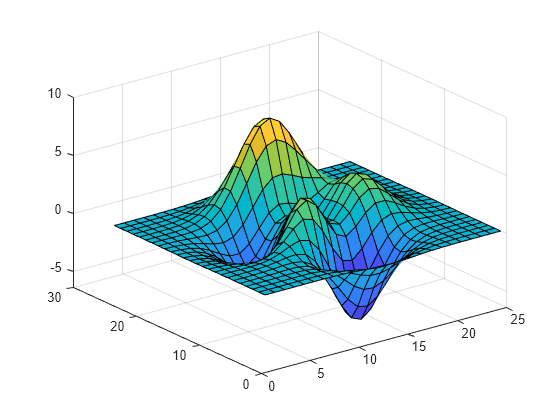

The picture above demonstrates some of the issues that an algorithm might run into when implementing gradient descent.

## Implementing Gradient Descent

### Taking the derivatives

Now, all of this calculus can seem intimidating, but the goal here is, now that we've established the formal defintions we can implement it simply. We will begin with taking the derivative of the loss function. We first need to find the derivative of the loss function with regards to the output of the Linear Regression Model like so $$ MSE =\sum \frac{1}{n} (y - \hat{y}) ^2$$ $$  MSE= \frac{1}{n} \sum  y^2 - 2y\hat{y} + \hat{y}^2 $$ $$\frac{\partial MSE}{\partial y}  = \frac{1}{n} \sum (-2y + 2 \hat{y})$$ $$\frac{\partial L }{\partial {\hat{y}}} =  \frac{2}{n} \sum(\hat{y} - y)$$

We then need to take the derivative in regards to the weights which luckily in linear regression is just the input meaning that each weights gradient can be described as $$\frac{\partial }{\partial w_i} = x_i$$ resulting in its gradient being $$\nabla w_i =  x_i \bullet \frac{\partial L }{\partial {\hat{y}}}$$ using the deriviative of the loss we just derived we get $$\nabla w_i =  x_i \bullet \frac{2}{n} \sum(\hat{y} - y)$$


The entire gradient vector can then be described formally as $$\nabla W =\frac{2}{n} X^T \bullet (\hat{y} - y)  $$ 
$X^T$ is the transpose of the feature matrix. Recall the transpose of a matrix is a linear map operation that interchages a matrix's rows with its columns.
The transpose of the feature matrix followed by the matrix multiplication of the derivative of the loss function simplifies out to applying the single element gradient we just derived. 

We can then say that a full update of the weights is $$W_{update} = W - \alpha \frac{2}{n} X^T \bullet (\hat{y} - y)$$


The bias is then updated by using the derivative of the loss function $$b_{update} = b - \alpha \frac{2}{n} (\hat{y} - y) $$ this is because the derivative of the bias is just the derivative of the loss thanks to it being a constant in regards to the input 

## Code for Gradient Descent

In [3]:
def mse_loss(targets,outputs):
    return np.mean((targets - outputs) ** 2)
        

In [4]:
def mse_loss_derivative(targets,outputs):
    s = 0
    for y,y_hat in zip(targets,outputs):
        s += (y - y_hat)
    return s * (2 / len(targets))

In [5]:
def gradient_descent(linear_model,features,targets,learning_rate = 0.0001):
    outputs = linear_model.forward(features)
    loss = mse_loss(targets,outputs)
    error = outputs - targets
    gradient = np.matmul(features.T,error) * (2/len(targets))

    linear_model.weights -= learning_rate * gradient
    linear_model.bias -= learning_rate * np.sum(error) *  (2/len(targets))
    return loss,outputs

In [6]:
x = np.array([[1,2,3,4] ,[4,3,2,1]])
y = np.array([[3],[4]])

In [7]:
gradient_descent(linear_regression_model,x,y)

(130.7798884478094,
 array([[-8.02763348],
        [-7.830092  ]]))

## Conclusion: Demonstrating correctness on the Diabetes Dataset

Now that we have a basic model we can optimize we can use Sklearn's Diabetes dataset to demonstrate the correctness of this approach. If you're not too familiar with data preparation and model evaluation, I'd suggest skipping this section as the code may not make much sense. In the next section I will be covering BackPropagation, how Neural Networks learn, and I will go into depth on how to evaluate models.

In [8]:
linear_regression_model = LinearModel(10)

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [10]:
X = X.to_numpy()
y = y.to_numpy()

In [11]:
print("X shape:", X.shape)
print("y shape:", y.shape)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X
# Combine scaled features and labels
data = np.column_stack((X_scaled, y))

# Shuffle the data
np.random.shuffle(data)

# Split into batches
batch_size = 4
batches = np.array_split(data, np.ceil(len(data) / batch_size))

# Separate features and labels in batches
num_features = X_scaled.shape[1]
X_batches = [batch[:, :num_features] for batch in batches]
y_batches = [batch[:, num_features:] for batch in batches]

# Split into train and test sets
split_point = int(len(X_batches) * 0.8)
X_train, X_test = X_batches[:split_point], X_batches[split_point:]
Y_train, Y_test = y_batches[:split_point], y_batches[split_point:]

print("Number of training batches:", len(X_train))
print("Number of test batches:", len(X_test))
print("Shape of first training batch:", X_train[0].shape)
print("Shape of first training label batch:", Y_train[0].shape)

X shape: (442, 10)
y shape: (442,)
Number of training batches: 88
Number of test batches: 23
Shape of first training batch: (4, 10)
Shape of first training label batch: (4, 1)


In [12]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math

def calculate_metrics(linear_regression_model, X, y):
    all_predictions = []
    all_true = []
    for X_batch, y_batch in zip(X, y):
        output = linear_regression_model.forward(X_batch)
        predictions = np.reshape(output, (output.shape[0],))
        all_predictions.extend(predictions)
        all_true.extend(y_batch)
    
    mse = mean_squared_error(all_true, all_predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(all_true, all_predictions)
    return mse, rmse, r2

# Example usage in the training loop
losses = []
gradients = []
num_epochs = 500
print_every = 10

for epoch in tqdm(range(num_epochs)):
    epoch_loss = 0
    for X_batch, y_batch in zip(X_train, Y_train):
        loss, output = gradient_descent(linear_regression_model, X_batch, y_batch)
        epoch_loss += loss
    
    losses.append(epoch_loss / len(X_train))
    
    if (epoch + 1) % print_every == 0:
        train_mse, train_rmse, train_r2 = calculate_metrics(linear_regression_model, X_train, Y_train)
        test_mse, test_rmse, test_r2 = calculate_metrics(linear_regression_model, X_test, Y_test)
        
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Loss: {losses[-1]:.4f}")
        print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
        print(f"Test  - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")
        print("-----------------------------")

# Final evaluation
train_mse, train_rmse, train_r2 = calculate_metrics(linear_regression_model, X_train, Y_train)
test_mse, test_rmse, test_r2 = calculate_metrics(linear_regression_model, X_test, Y_test)
print("Final Results:")
print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Test  - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

 14%|██████████████████▋                                                                                                                 | 71/500 [00:00<00:00, 707.19it/s]

Epoch 10/500
Loss: 21305.9384
Train - MSE: 20942.8346, RMSE: 144.7164, R²: -2.5203
Test  - MSE: 18818.0865, RMSE: 137.1790, R²: -2.2345
-----------------------------
Epoch 20/500
Loss: 15591.2171
Train - MSE: 15350.6230, RMSE: 123.8976, R²: -1.5803
Test  - MSE: 13565.5176, RMSE: 116.4711, R²: -1.3317
-----------------------------
Epoch 30/500
Loss: 11739.6176
Train - MSE: 11573.9657, RMSE: 107.5824, R²: -0.9455
Test  - MSE: 10146.4938, RMSE: 100.7298, R²: -0.7440
-----------------------------
Epoch 40/500
Loss: 9074.5663
Train - MSE: 8958.6772, RMSE: 94.6503, R²: -0.5059
Test  - MSE: 7849.6443, RMSE: 88.5982, R²: -0.3492
-----------------------------
Epoch 50/500
Loss: 7211.4184
Train - MSE: 7129.7493, RMSE: 84.4378, R²: -0.1985
Test  - MSE: 6291.6285, RMSE: 79.3198, R²: -0.0814
-----------------------------
Epoch 60/500
Loss: 5903.5705
Train - MSE: 5845.7630, RMSE: 76.4576, R²: 0.0174
Test  - MSE: 5235.3479, RMSE: 72.3557, R²: 0.1001
-----------------------------
Epoch 70/500
Loss: 49

 28%|█████████████████████████████████████▏                                                                                             | 142/500 [00:00<00:00, 708.81it/s]

Epoch 120/500
Loss: 3174.3995
Train - MSE: 3166.1656, RMSE: 56.2687, R²: 0.4678
Test  - MSE: 3335.9002, RMSE: 57.7573, R²: 0.4266
-----------------------------
Epoch 130/500
Loss: 3061.9272
Train - MSE: 3055.7303, RMSE: 55.2787, R²: 0.4864
Test  - MSE: 3294.8683, RMSE: 57.4009, R²: 0.4337
-----------------------------
Epoch 140/500
Loss: 2982.5564
Train - MSE: 2977.7959, RMSE: 54.5692, R²: 0.4995
Test  - MSE: 3275.7975, RMSE: 57.2346, R²: 0.4370
-----------------------------
Epoch 150/500
Loss: 2926.5085
Train - MSE: 2922.7614, RMSE: 54.0626, R²: 0.5087
Test  - MSE: 3270.7181, RMSE: 57.1902, R²: 0.4378
-----------------------------


 43%|███████████████████████████████████████████████████████▊                                                                           | 213/500 [00:00<00:00, 708.74it/s]

Epoch 160/500
Loss: 2886.8987
Train - MSE: 2883.8670, RMSE: 53.7016, R²: 0.5152
Test  - MSE: 3274.2428, RMSE: 57.2210, R²: 0.4372
-----------------------------
Epoch 170/500
Loss: 2858.8785
Train - MSE: 2856.3522, RMSE: 53.4449, R²: 0.5199
Test  - MSE: 3282.7688, RMSE: 57.2955, R²: 0.4358
-----------------------------
Epoch 180/500
Loss: 2839.0324
Train - MSE: 2836.8633, RMSE: 53.2622, R²: 0.5231
Test  - MSE: 3293.9206, RMSE: 57.3927, R²: 0.4338
-----------------------------
Epoch 190/500
Loss: 2824.9541
Train - MSE: 2823.0377, RMSE: 53.1323, R²: 0.5255
Test  - MSE: 3306.1624, RMSE: 57.4992, R²: 0.4317
-----------------------------
Epoch 200/500
Loss: 2814.9473
Train - MSE: 2813.2098, RMSE: 53.0397, R²: 0.5271
Test  - MSE: 3318.5284, RMSE: 57.6067, R²: 0.4296
-----------------------------
Epoch 210/500
Loss: 2807.8163
Train - MSE: 2806.2056, RMSE: 52.9736, R²: 0.5283
Test  - MSE: 3330.4367, RMSE: 57.7099, R²: 0.4276
-----------------------------
Epoch 220/500
Loss: 2802.7179
Train - MS

 57%|██████████████████████████████████████████████████████████████████████████▍                                                        | 284/500 [00:00<00:00, 709.07it/s]

Epoch 270/500
Loss: 2792.0345
Train - MSE: 2790.6958, RMSE: 52.8270, R²: 0.5309
Test  - MSE: 3382.7679, RMSE: 58.1616, R²: 0.4186
-----------------------------
Epoch 280/500
Loss: 2791.2463
Train - MSE: 2789.9196, RMSE: 52.8197, R²: 0.5310
Test  - MSE: 3388.3826, RMSE: 58.2098, R²: 0.4176
-----------------------------
Epoch 290/500
Loss: 2790.6425
Train - MSE: 2789.3245, RMSE: 52.8141, R²: 0.5311
Test  - MSE: 3393.2986, RMSE: 58.2520, R²: 0.4168
-----------------------------
Epoch 300/500
Loss: 2790.1706
Train - MSE: 2788.8589, RMSE: 52.8096, R²: 0.5312
Test  - MSE: 3397.5962, RMSE: 58.2889, R²: 0.4160
-----------------------------


 71%|█████████████████████████████████████████████████████████████████████████████████████████████                                      | 355/500 [00:00<00:00, 708.59it/s]

Epoch 310/500
Loss: 2789.7933
Train - MSE: 2788.4862, RMSE: 52.8061, R²: 0.5313
Test  - MSE: 3401.3503, RMSE: 58.3211, R²: 0.4154
-----------------------------
Epoch 320/500
Loss: 2789.4840
Train - MSE: 2788.1802, RMSE: 52.8032, R²: 0.5313
Test  - MSE: 3404.6295, RMSE: 58.3492, R²: 0.4148
-----------------------------
Epoch 330/500
Loss: 2789.2237
Train - MSE: 2787.9225, RMSE: 52.8008, R²: 0.5314
Test  - MSE: 3407.4955, RMSE: 58.3738, R²: 0.4143
-----------------------------
Epoch 340/500
Loss: 2788.9991
Train - MSE: 2787.6997, RMSE: 52.7987, R²: 0.5314
Test  - MSE: 3410.0029, RMSE: 58.3952, R²: 0.4139
-----------------------------
Epoch 350/500
Loss: 2788.8005
Train - MSE: 2787.5025, RMSE: 52.7968, R²: 0.5314
Test  - MSE: 3412.1999, RMSE: 58.4140, R²: 0.4135
-----------------------------
Epoch 360/500
Loss: 2788.6210
Train - MSE: 2787.3241, RMSE: 52.7951, R²: 0.5315
Test  - MSE: 3414.1285, RMSE: 58.4305, R²: 0.4132
-----------------------------
Epoch 370/500
Loss: 2788.4557
Train - MS

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 426/500 [00:00<00:00, 708.87it/s]

Epoch 420/500
Loss: 2787.7454
Train - MSE: 2786.4515, RMSE: 52.7868, R²: 0.5316
Test  - MSE: 3421.8039, RMSE: 58.4962, R²: 0.4119
-----------------------------
Epoch 430/500
Loss: 2787.6161
Train - MSE: 2786.3226, RMSE: 52.7856, R²: 0.5316
Test  - MSE: 3422.6430, RMSE: 58.5034, R²: 0.4117
-----------------------------
Epoch 440/500
Loss: 2787.4893
Train - MSE: 2786.1960, RMSE: 52.7844, R²: 0.5317
Test  - MSE: 3423.3988, RMSE: 58.5098, R²: 0.4116
-----------------------------
Epoch 450/500
Loss: 2787.3646
Train - MSE: 2786.0714, RMSE: 52.7832, R²: 0.5317
Test  - MSE: 3424.0822, RMSE: 58.5157, R²: 0.4115
-----------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 707.49it/s]

Epoch 460/500
Loss: 2787.2415
Train - MSE: 2785.9485, RMSE: 52.7821, R²: 0.5317
Test  - MSE: 3424.7028, RMSE: 58.5210, R²: 0.4114
-----------------------------
Epoch 470/500
Loss: 2787.1198
Train - MSE: 2785.8270, RMSE: 52.7809, R²: 0.5317
Test  - MSE: 3425.2687, RMSE: 58.5258, R²: 0.4113
-----------------------------
Epoch 480/500
Loss: 2786.9995
Train - MSE: 2785.7068, RMSE: 52.7798, R²: 0.5317
Test  - MSE: 3425.7869, RMSE: 58.5302, R²: 0.4112
-----------------------------
Epoch 490/500
Loss: 2786.8802
Train - MSE: 2785.5877, RMSE: 52.7787, R²: 0.5318
Test  - MSE: 3426.2635, RMSE: 58.5343, R²: 0.4111
-----------------------------
Epoch 500/500
Loss: 2786.7620
Train - MSE: 2785.4697, RMSE: 52.7775, R²: 0.5318
Test  - MSE: 3426.7037, RMSE: 58.5381, R²: 0.4110
-----------------------------
Final Results:
Train - MSE: 2785.4697, RMSE: 52.7775, R²: 0.5318
Test  - MSE: 3426.7037, RMSE: 58.5381, R²: 0.4110
